Si estrae per 3 volte una carta da un mazzo di 52 reinserendola ogni volta. 
Sapendo che nel mazzo ci sono 13 carte di cuori
1. la prob che vengano estratte 2 carte di cuori
2. la prob che vengano estratte 3 carte di cuori
3. la prob che venga estratta ALMENO 1 carta di cuori

In [11]:
from scipy.stats import binom

n = 3  
p = 13 / 52  

prob1= binom.pmf(2, n, p)
print("punto 1",prob1)

prob2 = binom.pmf(3, n, p)
print("punto 2",prob2)

prob3 = 1 - binom.pmf(0, n, p)
print("punto 3",prob3)

punto 1 0.14062499999999994
punto 2 0.015625
punto 3 0.578125


773.3333333333333
0.0
coefficienti: -inf inf
intervalli: (nan, nan)
intervalli: (nan, nan)
-inf
Stima di y per 48 ore:  nan
nan 2.4469118487916806
non possiamo rigettarla


C:\Users\danie\AppData\Local\Temp\ipykernel_12980\1448233491.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  b0=med_y - (sig_xy/sig_x2) * med_x
C:\Users\danie\AppData\Local\Temp\ipykernel_12980\1448233491.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  b1= sig_xy/sig_x2
C:\Users\danie\AppData\Local\Temp\ipykernel_12980\1448233491.py:23: RuntimeWarning: invalid value encountered in add
  y_hat=b0+b1*x
C:\Users\danie\AppData\Local\Temp\ipykernel_12980\1448233491.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  b0_int = (b0 - np.sqrt(s2) * np.sqrt((1/n) + (med_x*2) / (n * sig_x2)) * T, b0 + np.sqrt(s2) * np.sqrt((1/n) + (med_x*2) / (n * sig_x2)) * T)
C:\Users\danie\AppData\Local\Temp\ipykernel_12980\1448233491.py:38: RuntimeWarning: divide by zero encountered in scalar divide
  R=sig_xy**2/(sig_x2*sig_y2)
C:\Users\danie\AppData\Local\Temp\ipykernel_12980\1448233491.py:42: RuntimeWarning: invalid value encountered in add
  yy = 

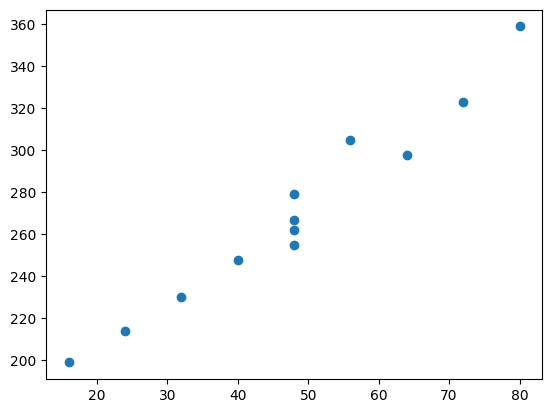

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

x = np.array([32,48,72,64,48,16,40,48,48,24,80,56])
y = np.array([230,262,323,298,255,199,248,279,267,214,359,305])
n=len(x)
med_x=np.mean(x)
med_y=np.mean(y)

sig_xy=1/n*(np.sum((x*y)-(med_x*med_y)))
print(sig_xy)

sig_x2=1/n*(np.sum(x*2 - med_x*2))
print(sig_x2)

b0=med_y - (sig_xy/sig_x2) * med_x


b1= sig_xy/sig_x2
print("coefficienti:",b0,b1)

y_hat=b0+b1*x
r=y-y_hat
s2 = np.sum(r**2) / (n - 2)
s=np.sqrt(s2)
a=0.05
T=t.ppf(1-a/2,n-2)

b0_int = (b0 - np.sqrt(s2) * np.sqrt((1/n) + (med_x*2) / (n * sig_x2)) * T, b0 + np.sqrt(s2) * np.sqrt((1/n) + (med_x*2) / (n * sig_x2)) * T)
b1_int = (b1 - T * np.sqrt(s2) / (np.sqrt(sig_x2 * n)), b1 + T * np.sqrt(s2) / (np.sqrt(sig_x2 * n)))



print("intervalli:",b0_int)
print("intervalli:",b1_int)
sig_y2=1/n*(np.sum(y*2 - med_y*2))
R=sig_xy**2/(sig_x2*sig_y2)
print(R)

xx = np.linspace(min(x), max(x), 100)
yy = b0 + b1 * xx

plt.plot(xx, yy, 'r')
plt.scatter(x, y)

#3

x = 48
quantita = b0 + b1 * x
print("Stima di y per 48 ore: ", quantita)


#4

sx=np.abs(np.sqrt(n)*(b1/s)*np.sqrt(sig_x2))
dx=t.ppf(1-a/2,n/2)

print(sx,dx)


if(sx>=dx):
    print("rigettiamo l'ipotesi")
else:
    print("non possiamo rigettarla")

[0.86752187 0.03156184 0.3398752  ... 0.99267485 0.4820859  0.4910707 ]


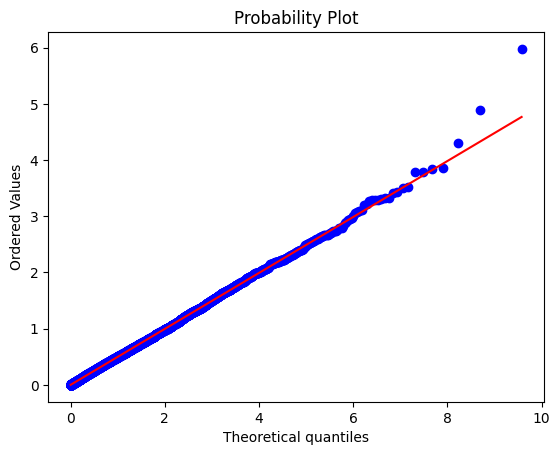

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.stats import probplot
lam = 2.
N = 10**4
X = np.random.rand(N)

print(X)

Y = -np.log(X)/lam  #DA PAG 16 PDF 8 

xx = np.linspace(0.,5.,1000)

yy = expon.pdf(xx, 0., 1./lam)


fig, ax = plt.subplots(1, 1)
probplot(Y, dist=expon, plot=ax)
plt.show()